In [4]:
# Download dataset
!wget --no-check-certificate \
    https://codeload.github.com/AtaKimi/KecerdasanTest/zip/refs/heads/main \
    -O /tmp/datasets2.zip

--2021-11-16 07:33:24--  https://codeload.github.com/AtaKimi/KecerdasanTest/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/datasets2.zip’

/tmp/datasets2.zip      [     <=>            ]  29.10M  29.0MB/s    in 1.0s    

2021-11-16 07:33:25 (29.0 MB/s) - ‘/tmp/datasets2.zip’ saved [30509560]



In [5]:
import os
import zipfile

local_zip = '/tmp/datasets2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
base_dir = '/tmp/KecerdasanTest-main'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

train_jambu_biji_dir = os.path.join(train_dir, 'Folder Jambu Biji')
train_pandan_dir = os.path.join(train_dir, 'Foto Daun Pandan')

validation_jambu_biji_dir = os.path.join(validation_dir, 'Folder Jambu Biji')
validation_pandan_dir = os.path.join(validation_dir, 'Foto Daun Pandan')

In [7]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_jambu_biji_dir)[:10])
print(os.listdir(train_pandan_dir)[:10])

['021.jpg', '044.jpg', '046.jpg', '023.jpg', '028.jpg', '039.jpg', '033.jpg', '050.jpg', '040.jpg', '026.jpg']
['087.jpg', '074.jpg', '081.jpg', '075.jpg', '077.jpg', '083.jpg', '096.jpg', '088.jpg', '098.jpg', '092.jpg']


In [8]:
# Cek jumlah data train dan data validation
print('total training jambu biji images:', len(os.listdir(train_jambu_biji_dir)))
print('total training daun pandan images:', len(os.listdir(train_pandan_dir)))
print('total validation jambu biji images:', len(os.listdir(validation_jambu_biji_dir)))
print('total validation daun pandan images:', len(os.listdir(validation_pandan_dir)))

total training jambu biji images: 30
total training daun pandan images: 30
total validation jambu biji images: 20
total validation daun pandan images: 20


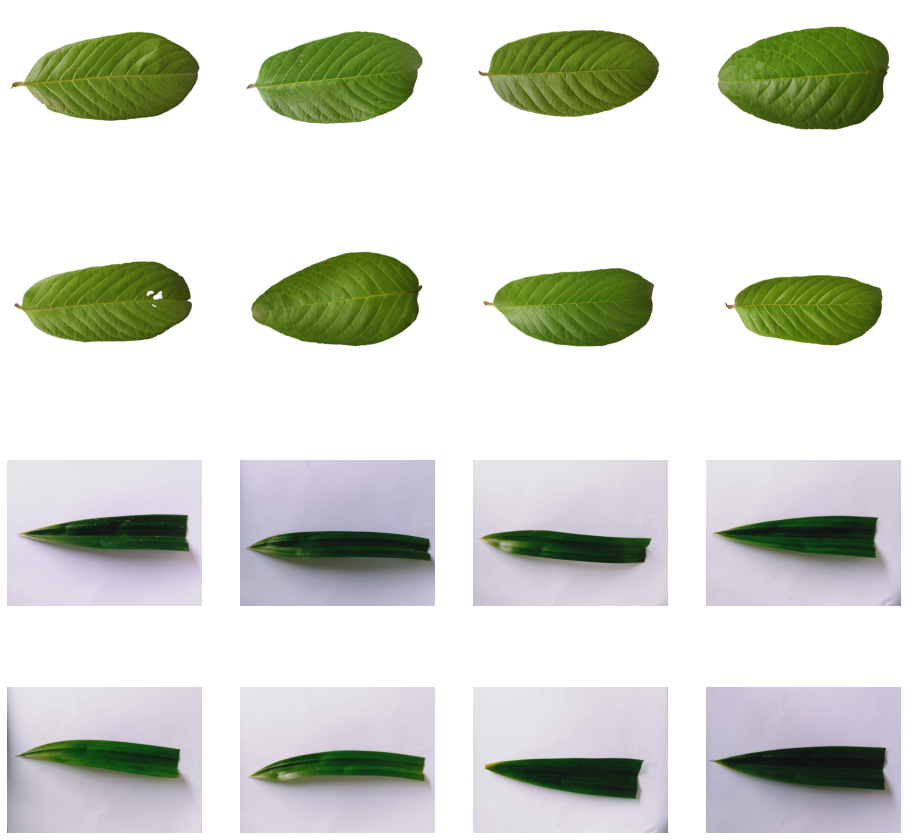

In [9]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jambu_biji_pix = [os.path.join(train_jambu_biji_dir, fname) 
                for fname in os.listdir(train_jambu_biji_dir)[pic_index-8:pic_index]]
next_pandan_pix = [os.path.join(train_pandan_dir, fname) 
                for fname in os.listdir(train_pandan_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jambu_biji_pix+next_pandan_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (60, 150, 150, 3)
Train Label =  (60,)
Validation Data =  (40, 150, 150, 3)
Validation Label =  (40,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[25:35])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[25:35])

<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

<h3>Evaluasi Model</h3>

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))